## Import Libriaries
#### Bring in the ever important pandas and alias it as the common 'pd' and bring in numpy as the common alias 'np'  and bring in matplotlib as plt

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Read in the data. 

### Read in the data with the pandas function 'read_csv' and then look at the first 5 rows of data with the .head() method  The data is in a .csv file called 'Chicago_Crimes_2012_to_2017.csv' it is located under the data directory under this one. 

In [63]:
crimes = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv')
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## NICE! You now have a dataframe with all of the crimes that were recorded in the city of Chicago from the years 2012 - 2017. 

#### You can see just from the first 5 rows this is a very robust dataset with 23 features(columns) some of these will be useful for this exercise some will not, but we can go through that as we go. What we are going to attempt to do, is find out what crimes if committed give you a higher probability of arrest. 

#### First thing we need to do is get an idea of the condition our data is in, that way we can make adjustments so that it is ready to go through some machine learning to see if we can predict arrests or not. 

#### So let's run some tests, good thing pandas has a lot of built in functionality to help us with this. we will start with the .shape attribute this lets us see how may rows and columns we have. 

#### NOTE: methods like '.head()' always have the '()' trail them, attributes like '.shape' do not have that. 

In [64]:
crimes.shape

(1456714, 23)

### Wow! over 1.4M observations, spanned at 23 rows. This is not exactly 'Big Data' but it is getting close,  Big Data really refers to(and I am going to give you my take other Data Scientists may think diffrently) if the data to large that you run out of memory on your computer(we are talkng RAM here) then it is likely Big Data....

#### Now lets see what kind of data types we are dealing with. Pandas makes this easy as well. with the .dtypes 

In [65]:
crimes.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## Doh! the dreaded 'object' class. This is the datatype that pandas assigns arbitraily if it can not make sense of what kind of datatype it is. 

If we go back up and look at the .head() call we can figure out what data types should be in those columns by looking throught the data. So a couple of these can be looked at and immedietly we can figure them out. 'date' for instance can be cast back into a date time data type. A bunch of these are most likely catagorical variables. which basically means that the data is limited to a finite number of categories like 'Location_Discription' for instance likely only has about 10 diffrent inputs. There are special ways to deal with this so that we can do further analysis, lets check on this one first. Here we are going to use the 'dot notation method' to grab the column(it just means you put the call like this(df.column)) and then add a chained method to get unique values on the column. first we will call df.column.unique() we can also wrap that into a len statement to see how many cats we are dealing with.

### Slight edit, we can't use dot notation on the columns with two or more words right now, because they have a space between the words instead of '_'  the underscore is super important. so we will rename those columns to fix that in the next cell

In [66]:
crimes['Description'].unique()
len(crimes['Description'].unique())

342

## Renaming Columns:
To rename a column into something a bit more usable we basically just add a new column and fill it with the data from the old column, then we drop the old column. First get a list of all the colums

In [67]:
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

### In pandas and python there is always more than one way to skin a cat. That method is great if you only have one value to change. Since we have such a long list we can create a dictionary of {key:value} pairs  with {'old_column_name':'new_column_name'} and use the rename() method. rename has an argument columns =  that lets you feed it the dictionary and it will take care of the rest.  

In [68]:
cols ={'ID':'id', 
       'Case Number':'case_number', 
       'Date':'date', 
       'Block':'block',
       'Primary Type':'primary_type',
       'Description':'description',
       'Location Description':'location_description',
      'Arrest':'arrest',
      'Domestic':'domestic',
      'Beat':'beat',
      'District':'district',
      'Ward':'ward',
      'Community Area':'community_area',
      'FBI Code':'FBI_code',
      'X Coordinate':'X_corr',
      'Y Coordinate':'Y_corr',
      'Year':'year',
      'Updated On':'updated_on',
      'Latitude':'latitude',
      'Longitude':'longitude',
      'Location':'location'}

crimes.rename(columns=cols, inplace=True)
crimes.head()

,Unnamed: 0,id,case_number,date,block,IUCR,primary_type,description,location_description,arrest,...,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Now that we have the columns squared away lets see how many missing values we have:

To do this we will call df.isnull().sum() so we are chaining isnull()- which looks for missing or NaN in columns, and sum which will aggrigate the totals for each column. 

In [69]:
crimes.isnull().sum()

Unnamed: 0                  0
id                          0
case_number                 1
date                        0
block                       0
IUCR                        0
primary_type                0
description                 0
location_description     1658
arrest                      0
domestic                    0
beat                        0
district                    1
ward                       14
community_area             40
FBI_code                    0
X_corr                  37083
Y_corr                  37083
year                        0
updated_on                  0
latitude                37083
longitude               37083
location                37083
dtype: int64

### So about 2% of our data has missing values, the columns that have missing values are not numeric from a calculations stand point so it would be hard to guess what to imput in the place of those missing values. So we will just drop those observations it should not affect our outcome. 

In [70]:
crimes2 = crimes.dropna()

### Lets run the null count again to make sure that took. 

In [71]:
crimes2.isnull().sum()

Unnamed: 0              0
id                      0
case_number             0
date                    0
block                   0
IUCR                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
FBI_code                0
X_corr                  0
Y_corr                  0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64

### Ok now we have 0 null records. now lets make sure we dont have any duplicate records. 

In [72]:
crimes2.duplicated().sum()

0

### Great so no duplicates and no nulls. now we need to do a bit of feature engineering to get our data ready for the scikit learn ML library. First we need to encode all of the categorical variables (this is called One-hot ecoding in python.) First thing we need to do is change all the 'object' type data structures to categorical, we are going to use a for loop for this because it just works. 

In [73]:
cat_cols_df = crimes2.drop(columns = ['location','longitude','latitude','arrest','domestic','updated_on','X_corr','Y_corr','date','case_number'])
cat_cols = cat_cols_df.columns
for col in cat_cols:
    crimes2[col] = crimes[col].astype('category')
    
crimes2.dtypes   

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Unnamed: 0              category
id                      category
case_number               object
date                      object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
dtype: object

### Ok now all of our columns that need to be are of type category! now to deal with Time. this can be troublesome. notice that we categorized the year column. we will do similar things to a time of day column and season of year. but we have to create those first

In [74]:
crimes2.date = pd.to_datetime(crimes2.date)
crimes2.dtypes

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Unnamed: 0                    category
id                            category
case_number                     object
date                    datetime64[ns]
block                         category
IUCR                          category
primary_type                  category
description                   category
location_description          category
arrest                            bool
domestic                          bool
beat                          category
district                      category
ward                          category
community_area                category
FBI_code                      category
X_corr                         float64
Y_corr                         float64
year                          category
updated_on                      object
latitude                       float64
longitude                      float64
location                        object
dtype: object

In [75]:
crimes2.head()

,Unnamed: 0,id,case_number,date,block,IUCR,primary_type,description,location_description,arrest,...,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Now that we have the date as a date time object we can set it as the index, and then pull information from there. 

In [76]:
crimes2.set_index('date', inplace=True)

crimes2['month'] = crimes2.index.month
crimes2['hour'] = crimes2.index.hour

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
crimes2['weekday_name'] = crimes2.index.weekday_name
crimes2.head()

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday


In [78]:
crimes2['day_of_week'] = crimes2.index.weekday
crimes2.head()

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1


In [79]:
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                      int64
hour                       int64
weekday_name              object
day_of_week                int64
dtype: object

In [80]:
crimes2.head()

,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1


In [81]:
crimes2['time_of_day'] = pd.cut(crimes2.hour, 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['overnight','morning','afternoon','evening'])
crimes2.head()


/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening


In [82]:
crimes2['season'] = pd.cut(crimes2.month, 
                    bins=[2,5,8,11,12], 
                    include_lowest=True, 
                    labels=['spring','summer','fall','winter'])
crimes2.head()



/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring


In [83]:
crimes2['weekday'] = ((crimes2.day_of_week) // 5 == 0).astype(float)
crimes2.head()

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0


In [84]:
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                      int64
hour                       int64
weekday_name              object
day_of_week                int64
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [85]:
crimes2.month = crimes2.month.astype('category')
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                   category
hour                       int64
weekday_name              object
day_of_week                int64
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [86]:
columns = ['weekday_name','day_of_week','hour']
for col in columns:
    crimes2[col] = crimes2[col].astype('category')
    
crimes2.dtypes

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                   category
hour                    category
weekday_name            category
day_of_week             category
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [87]:
crimes2.arrest.value_counts()

False    1047308
True      371057
Name: arrest, dtype: int64

In [88]:
(crimes2.arrest == 'True').astype('int')
crimes2.head()

/Users/patj34/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0


Class 0: 1047308
Class 1: 371057
Proportion: 2.82 : 1


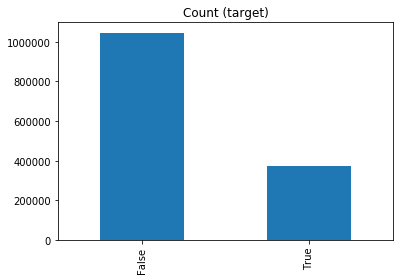

In [89]:
target_count = crimes2.arrest.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [90]:
crimes2.head()

,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,...,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0


### How many crimes were committed by year? 

Hint use a groupby clause and visualize the output. 

year
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: id, dtype: int64


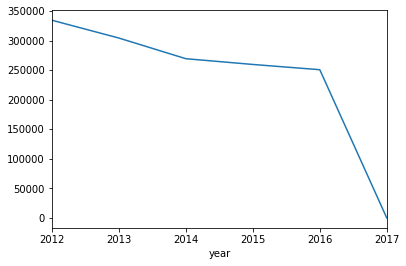

In [91]:
crimes_year = crimes2.groupby('year')['id'].count()
print(crimes_year)
crimes_year.plot()
plt.show()

### How many crimes were commited by type per year?


In [36]:
crimes_byyear_bytype = crimes2.groupby(['primary_type', 'year'])['id'].count()
crimes_byyear_bytype.head(40)

primary_type                       year
ARSON                              2012      469
                                   2013      364
                                   2014      390
                                   2015      448
                                   2016      504
ASSAULT                            2012    19890
                                   2013    17925
                                   2014    16668
                                   2015    16945
                                   2016    18080
BATTERY                            2012    59117
                                   2013    53869
                                   2014    48690
                                   2015    48579
                                   2016    48686
BURGLARY                           2012    22834
                                   2013    17825
                                   2014    14311
                                   2015    13086
                             

### What is the percentage of arrests by crime commited per year?

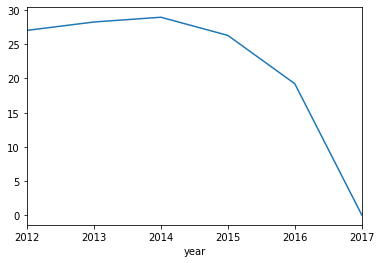

In [96]:
arrest_mask = crimes2.arrest == True

crimes_arrests_T = crimes2[arrest_mask]
crimes_byyear_T = crimes_arrests_T.groupby('year')['id'].count()
#crimes_arrests_T.head()
#crimes_byyear_T
arrests_byyear_pct = crimes_byyear_T/crimes_year * 100

arrests_byyear_pct.plot()
plt.show()

In [60]:

crimes_arrests_T_byyear = crimes_arrests_T.groupby(['primary_type', 'year'])['id'].count()
#crimes_arrests_T_byyear
arrest_pct_byyear = (crimes_arrests_T_byyear/crimes_byyear_bytype * 100).round(2)
arrest_pct_byyear

#arrest_pct_byyear.plot(kind='barh')
#plt.show()

primary_type       year
ARSON              2012     9.81
                   2013    12.64
                   2014     8.21
                   2015    10.71
                   2016     8.53
                           ...  
WEAPONS VIOLATION  2012    83.65
                   2013    82.02
                   2014    82.99
                   2015    79.83
                   2016    71.51
Name: id, Length: 159, dtype: float64

### What percentage of crimes are Domestic in nature by year?


In [99]:
domestic_mask = crimes2.domestic == True
domestic_crime = crimes2[domestic_mask]
#domestic_crime.head()
domestic_crime_byyear = domestic_crime.groupby('year')['id'].count()
#domestic_crime_byyear

domestic_pct = domestic_crime_byyear/crimes_year * 100
domestic_pct

year
2012    14.482187
2013    14.653249
2014    14.743678
2015    15.929664
2016    16.374854
2017     0.000000
Name: id, dtype: float64

In [103]:
len(crimes2.primary_type.unique())

33

### How many Domestic Assualts were there?

### How many Homocides were there?
### What percentage of Homocides were Domestic?

### Is there a concentration of violent crimes in certain parts of Chicago? 
Hint: you are going to have to subset the crimes types that are considered violent(you will have to decide which) 

### What time of day is most active for crime? 
### What day of the week is most active?
### What month is most active?

### Where do most crimes occur?
### Where do most Homocides occur?


### What days and hours have the most crimes?

### When you are done commit your changes back to the repo. you will need to follow the instructions [here](https://kbroman.org/github_tutorial/pages/fork.html)